In [1]:
library(rDEA)
library(readr)
library(tidyverse)

Using the GLPK callable library version 5.0

── Attaching core tidyverse packages ─────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ purrr     1.0.1
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
── Conflicts ───────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read_csv("data/BenchmarkingSample20230607_with_features.csv")
df

Rows: 216 Columns: 42
── Column specification ───────────────────────────────────────────────────────
Delimiter: ","
chr   (1): Unit
dbl  (40): Days, Period, Advertising, Cost of Sales - Food, Cost of Sales - ...
date  (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Unit,Date,Days,Period,Advertising,Cost of Sales - Food,Cost of Sales - Paper,Crew Labor,Maintenance & Repair,Management Labor,⋯,Total Cost of Sales,Gross Profit,Total Labor,Total Prime Costs,Total Controllable Costs,Controllable Profit,Total Non-controllable Costs,Store EBITDA,Adjusted daily Rent,Average Daily Cost
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00040302CD88,2021-04-30,30,1,3778,20557,2190,486,5135,3983,⋯,22747,67205,7898,30645,34531,32674,22747,9927,15.00333,2060.983
00040302CD88,2021-05-31,31,2,3805,20876,2058,1376,1553,4255,⋯,22934,67660,9330,32264,29278,38382,22934,15448,15.00333,1831.933
00040302CD88,2021-06-30,30,3,3440,19531,2291,178,2321,4241,⋯,21822,60087,8033,29855,27747,32340,21822,10518,15.00333,1801.663
00040302CD88,2021-07-31,31,4,3672,20999,2056,36597,3412,5515,⋯,23055,64363,49056,72111,71261,-6898,23055,-29953,15.00333,3182.123
00040302CD88,2021-08-31,31,5,3827,21357,2312,29942,3345,5484,⋯,23669,67440,42535,66204,64950,2490,23669,-21179,15.00333,2956.193
00040302CD88,2021-09-30,30,6,3953,26257,3913,29863,5861,5416,⋯,30170,63947,41988,72158,65627,-1680,30170,-31850,15.00333,3334.653
00040302CD88,2021-10-31,31,7,4275,25724,2832,31574,1379,4927,⋯,28556,73239,43373,71929,68876,4363,28556,-24193,15.00333,3262.183
00040302CD88,2021-11-30,30,8,3864,23801,2578,27787,2599,5218,⋯,26379,65630,39144,65523,60585,5045,26379,-21334,15.00333,3031.423
00040302CD88,2021-12-31,31,9,4082,23452,2686,31487,1611,5048,⋯,26138,71056,42888,69026,63434,7622,26138,-18516,15.00333,3024.903


In [3]:
# Group data
grouped_df <- df %>% 
  group_by(Unit) %>% 
  summarise(across(everything(), mean), .groups = 'drop') %>% 
  as.data.frame()
grouped_df

Unit,Date,Days,Period,Advertising,Cost of Sales - Food,Cost of Sales - Paper,Crew Labor,Maintenance & Repair,Management Labor,⋯,Total Cost of Sales,Gross Profit,Total Labor,Total Prime Costs,Total Controllable Costs,Controllable Profit,Total Non-controllable Costs,Store EBITDA,Adjusted daily Rent,Average Daily Cost
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00040302CD88,2022-04-15,30.41667,12.5,4572.542,30026.08,3422.542,29224.62,3276.417,4383.583,⋯,33448.62,77875.67,40061.29,73509.92,64331.54,13544.12,33448.62,-19904.500,15.00333,3389.591
00040302CE36,2022-04-15,30.41667,12.5,9547.917,56146.62,6208.208,53511.08,3240.875,5290.500,⋯,62354.83,168642.75,69627.08,131981.92,100379.62,68263.12,62354.83,5908.292,861.67167,6473.349
00040302CF03,2022-04-15,30.41667,12.5,6214.375,36762.04,4331.917,37789.67,3285.167,4609.625,⋯,41093.96,110230.25,50286.12,91380.08,76518.04,33712.21,41093.96,-7381.750,84.55000,4181.079
00040302CF28,2022-04-15,30.41667,12.5,7554.500,46707.92,5690.208,43988.79,3798.333,5798.667,⋯,52398.12,131080.29,59195.42,111593.54,91135.92,39944.38,52398.12,-12453.750,391.95478,5342.727
00040302D006,2022-04-15,30.41667,12.5,2663.542,16170.67,1950.167,11699.62,2352.792,3257.667,⋯,18120.83,47248.29,18271.00,36391.83,32024.88,15223.42,18120.83,-2897.417,NA,1840.473
00040302D014,2022-04-15,30.41667,12.5,10511.833,59285.92,6207.208,54751.62,3433.042,6208.542,⋯,65493.12,188806.75,71959.83,137452.96,100287.71,88519.04,65493.12,23025.917,1289.15333,7022.499
0004030A635E,2022-04-15,30.41667,12.5,21291.125,121041.00,13069.875,103918.50,4886.458,8231.125,⋯,134110.88,380002.25,134753.46,268864.33,183942.83,196059.42,134110.88,61948.542,2969.68708,13885.792
0004030B92EE,2022-04-15,30.41667,12.5,13411.375,79249.92,8527.250,72383.17,5175.958,6148.208,⋯,87777.17,236223.92,92771.08,180548.25,132391.25,103832.67,87777.17,16055.500,1750.34375,9304.859
0004030BEB57,2022-04-15,30.41667,12.5,16329.292,94429.38,10514.458,86954.29,5033.917,5659.625,⋯,104943.83,289412.50,109592.12,214535.96,156537.08,132875.42,104943.83,27931.583,2175.30833,11192.531


In [4]:
## Specify Inputs and Outputs for DEA
Y <- grouped_df['Gross Profit']
X <- grouped_df['Total Cost of Sales']

In [5]:
## Calculate Naive input-oriented DEA score for first 5 units under variable returns-to-scale
units <- 1 : nrow(X)
di_naive <- dea(XREF = X, YREF=Y, X = X[units, ], Y = Y[units, ], model = 'input')
di_naive

0,0,0,0,0.7836415,2.163585e-01,0.0000000,0,0
0,0,0,0,0.1424429,8.575571e-01,0.0000000,0,0
0,0,0,0,0.5550816,4.449184e-01,0.0000000,0,0
0,0,0,0,0.4077924,5.922076e-01,0.0000000,0,0
0,0,0,0,1.0000000,0.000000e+00,0.0000000,0,0
0,0,0,0,0.0000000,1.000000e+00,0.0000000,0,0
0,0,0,0,0.0000000,2.206575e-16,1.0000000,0,0
0,0,0,0,0.0000000,7.519964e-01,0.2480036,0,0
0,0,0,0,0.0000000,4.738069e-01,0.5261931,0,0


In [6]:
## Tabulate the dea score for each unit
efficiency_data <- data.frame(
  Unit = grouped_df$Unit,
  Efficiency = di_naive$thetaOpt
)
efficiency_data

Unit,Efficiency
<chr>,<dbl>
00040302CD88,0.8481733
00040302CE36,0.9421127
00040302CF03,0.9538540
00040302CF28,0.8812351
00040302D006,1.0000000
00040302D014,1.0000000
0004030A635E,1.0000000
0004030B92EE,0.9400004
0004030BEB57,0.9681304


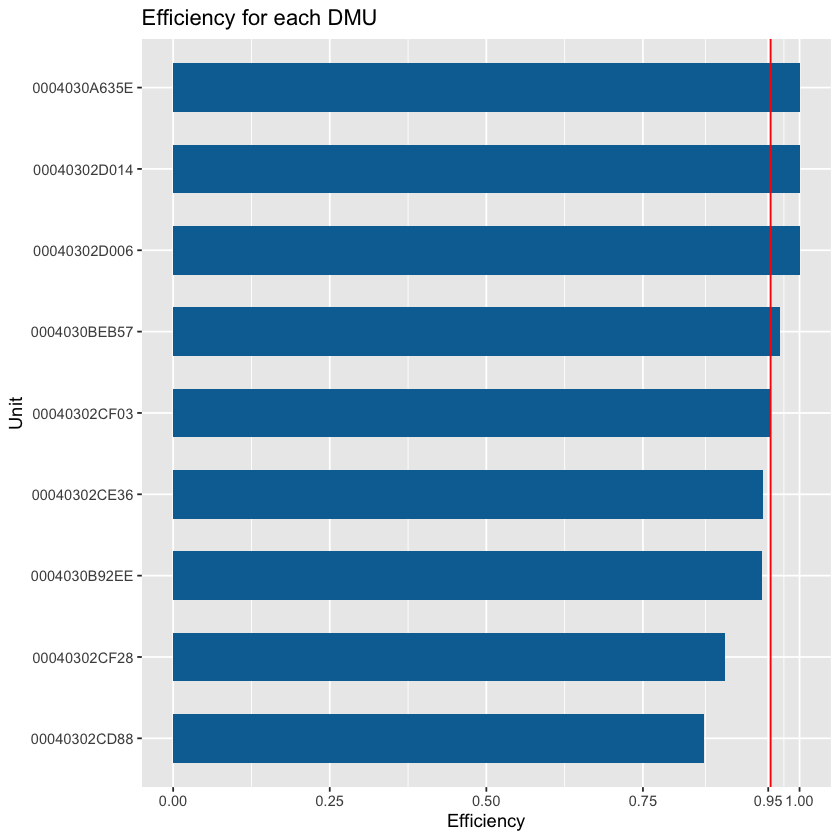

In [17]:
## Plot the efficiency for the unit in descending order
ordered_efficiency_data <- arrange(efficiency_data, Efficiency)
ordered_efficiency_data$Unit <- 
  factor(ordered_efficiency_data$Unit, 
         levels = ordered_efficiency_data$Unit) 

BLUE <- "#076fa2"
benchmark <- median(efficiency_data$Efficiency)
plt <- ggplot(ordered_efficiency_data) + 
  geom_col(aes(Efficiency, Unit), fill = BLUE, width = 0.6) + 
  geom_vline(xintercept = benchmark, linetype=1, colour="red") + 
  ggtitle('Efficiency for each DMU') + 
  scale_x_continuous(breaks=c(0.0, 0.25, 0.5, 0.75, round(benchmark, 2), 1.0))
plt